<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Find-total-quantity-of-product-involved-in-energy" data-toc-modified-id="Find-total-quantity-of-product-involved-in-energy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Find total quantity of product involved in energy</a></span></li><li><span><a href="#Product-Classes" data-toc-modified-id="Product-Classes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Product Classes</a></span></li><li><span><a href="#Oil-Global-Production" data-toc-modified-id="Oil-Global-Production-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Oil Global Production</a></span></li><li><span><a href="#Coal-Peat-and-Oil-Shale-Global-Production" data-toc-modified-id="Coal-Peat-and-Oil-Shale-Global-Production-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Coal Peat and Oil Shale Global Production</a></span></li><li><span><a href="#Natural-Manufactured-or-Recovered-Natural-Gas-Global-Production" data-toc-modified-id="Natural-Manufactured-or-Recovered-Natural-Gas-Global-Production-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Natural Manufactured or Recovered Natural Gas Global Production</a></span></li><li><span><a href="#Biofuels-and-Waste-Products" data-toc-modified-id="Biofuels-and-Waste-Products-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Biofuels and Waste Products</a></span></li><li><span><a href="#Electricity-Production" data-toc-modified-id="Electricity-Production-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Electricity Production</a></span></li></ul></div>

In [597]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import collections

In [2]:
energy_df = pd.read_csv("all_energy_statistics.csv")
energy_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [3]:
# expand all column widths so that entire strings can be read in each cell
pd.options.display.max_colwidth = 200

In [4]:
# identify the types of objects in the data frame
energy_df.info()

# data is missing from the quantity footnotes column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
country_or_area          1189482 non-null object
commodity_transaction    1189482 non-null object
year                     1189482 non-null int64
unit                     1189482 non-null object
quantity                 1189482 non-null float64
quantity_footnotes       163946 non-null float64
category                 1189482 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


In [5]:
# find number of unique values in each column
print(f"Number of Unique Countries {energy_df.country_or_area.nunique()}")
print(f"Number of Unique Products {energy_df.category.nunique()}")
print(f"Number of Unique Transactions {energy_df.commodity_transaction.nunique()}")
print(f"Different Units of Measure {energy_df.unit.nunique()}")
print(f"Different FootNote Values {energy_df.quantity_footnotes.nunique()}")

Number of Unique Countries 243
Number of Unique Products 71
Number of Unique Transactions 2452
Different Units of Measure 6
Different FootNote Values 1


In [6]:
latest_year = energy_df['year'].max()
earliest_year = energy_df['year'].min()

print(f'Earliest year: {earliest_year} \nLatest year: {latest_year}')

Earliest year: 1990 
Latest year: 2014


# Find total quantity of product involved in energy

In [7]:
total_energy = energy_df.groupby(['category', 'unit']).mean().round(2).drop(['year', 'quantity_footnotes'], axis=1)
total_energy.head()

,,quantity
category,unit,
additives_and_oxygenates,"Metric tons, thousand",355.34
animal_waste,Terajoules,50930.30
anthracite,"Metric tons, thousand",534.20
aviation_gasoline,"Metric tons, thousand",18.19
bagasse,"Metric tons, thousand",3815.99


In [8]:
# reset index to plot quantity against products
total_energy = total_energy.reset_index()

In [9]:
total_energy = total_energy.sort_values(by=['quantity'], ascending=False)
total_energy.head()

,category,unit,quantity
11,brown_coal,"Metric tons, thousand",1967868.84
30,hard_coal,"Metric tons, thousand",1694778.49
41,natural_gas_including_lng,Terajoules,1343446.28
57,peat,"Metric tons, thousand",736122.47
17,conventional_crude_oil,"Metric tons, thousand",253327.06


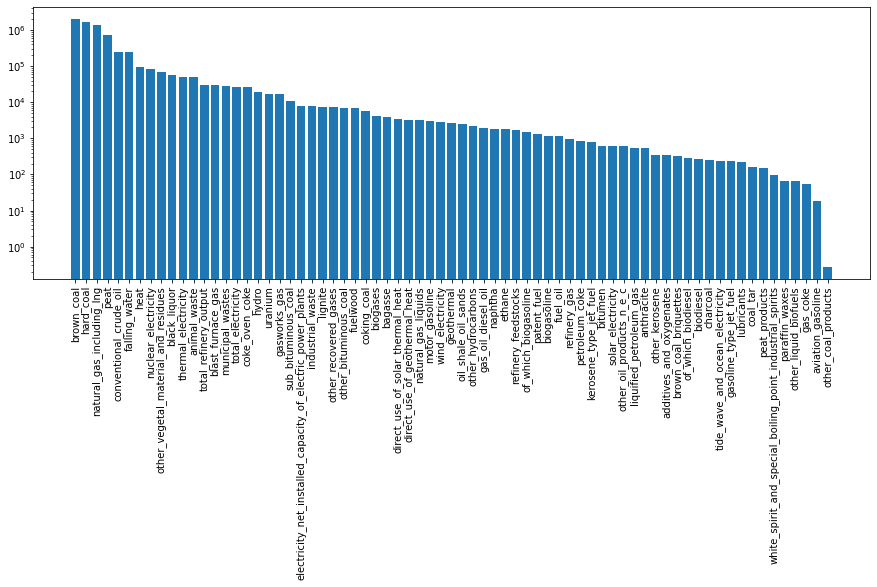

In [10]:
plt.figure(figsize=(15,5))

plt.bar(total_energy['category'], total_energy['quantity'])
plt.xticks(rotation=90)
plt.yscale('log')

plt.show()

# Product Classes

In [11]:
# The graph above shows how much of each product has been produced, transformed, exported, imported, and/or consumed 
# from 1990 to 2014 in any country. This is very general and does not provide much information.

# Need to break down this data into sections
#        *Products_Class
#        *Consumption
#        *Transformation Processes

In [12]:
# Drop FootNote Column
energy_df = energy_df.drop(['quantity_footnotes'], axis=1)

# Rename category column to product and add empty column named product class
energy_df = energy_df.rename(columns={"category":"product"})
energy_df["product_class"] = ''

In [13]:
energy_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates,
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates,
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates,
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates,
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates,


In [14]:
energy_df[energy_df['commodity_transaction'].str.contains("total")].head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
121826,Albania,Lignite brown coal - total known reserves,2014,"Metric tons, thousand",727000.0,brown_coal,
121827,Albania,Lignite brown coal - total known reserves,2005,"Metric tons, thousand",794000.0,brown_coal,
121828,Albania,Lignite brown coal - total known reserves,2002,"Metric tons, thousand",712000.0,brown_coal,
121829,Albania,Lignite brown coal - total known reserves,2001,"Metric tons, thousand",712000.0,brown_coal,
121830,Albania,Lignite brown coal - total known reserves,2000,"Metric tons, thousand",712000.0,brown_coal,


In [15]:
energy_df[energy_df['commodity_transaction'].str.contains("Total")].head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
1300,Argentina,Additives and Oxygenates - Total energy supply,2014,"Metric tons, thousand",369.0,additives_and_oxygenates,
1301,Argentina,Additives and Oxygenates - Total energy supply,2013,"Metric tons, thousand",379.0,additives_and_oxygenates,
1302,Argentina,Additives and Oxygenates - Total energy supply,2012,"Metric tons, thousand",393.0,additives_and_oxygenates,
1303,Argentina,Additives and Oxygenates - Total energy supply,2011,"Metric tons, thousand",355.0,additives_and_oxygenates,
1304,Argentina,Additives and Oxygenates - Total energy supply,2010,"Metric tons, thousand",418.0,additives_and_oxygenates,


In [16]:
# Need to convert all string to lower
energy_df['country_or_area'] = energy_df['country_or_area'].str.lower()
energy_df['commodity_transaction'] = energy_df['commodity_transaction'].str.lower()
energy_df['product'] = energy_df['product'].str.lower()

In [17]:
energy_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
0,austria,additives and oxygenates - exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates,
1,austria,additives and oxygenates - exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates,
2,belgium,additives and oxygenates - exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates,
3,belgium,additives and oxygenates - exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates,
4,belgium,additives and oxygenates - exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates,


In [18]:
# Create lists of product classes to compare products against
Oil_Class = ['additives_and_oxygenates', 'paraffin_waxes', 'conventional_crude_oil', 'natural_gas_liquids','other_hydrocarbons','aviation_gasoline','motor_gasoline','biogasoline','of_which_biogasoline','gasoline_type_jet_fuel','kerosene_type_jet_fuel','other_kerosene','gas_oil_diesel_oil','of_which_biodiesel','biodiesel','fuel_oil','liquified_petroleum_gas','refinery_feedstocks','naphtha','white_spirit_and_special_boiling_point_industrial_spirits','lubricants','bitumen','paraffin_waxes','petroleum_coke','refinery_gas','ethane','other_oil_products_n_e_c']
Coal_Peat_Oil_Shales_Class = ['hard_coal','anthracite','coking_coal','other_bituminous_coal','brown_coal','sub_bituminous_coal','lignite','peat','oil_shale_oil_sands','coke_oven_coke','gas_coke','patent_fuel','brown_coal_briquettes','peat_products','coal_tar','other_coal_products']
Natural_Manufactured_Recovered_Gas_Class = ['natural_gas_including_lng','gasworks_gas','coke_oven_gas','blast_furnace_gas','other_recovered_gases']
Electricity_Class = ['electricity_net_installed_capacity_of_electric_power_plants','electricity', 'hydro','nuclear_electricity','solar_electricity','thermal_electricity','tide_wave_and_ocean_electricity','total_electricity','total_refinery_output','wind_electricity','falling_water','geothermal']
Heat_Class = ['heat','direct_use_of_geothermal_heat','direct_use_of_solar_thermal_heat']
Biofuels_Waste_Class = ['fuelwood','charcoal','bagasse','animal_waste','other_vegetal_material_and_residues','municipal_wastes','industrial_waste','black_liquor','biogasoline','biodiesels','bio_jet_kerosene','other_liquid_biofuels','biogases','uranium']


In [19]:
energy_df.loc[energy_df["product"] == "natural_gas_including_lng"].max()

country_or_area                      yugoslavia, sfr (former)
commodity_transaction    natural gas (including lng) - vented
year                                                     2014
unit                                               Terajoules
quantity                                          2.12782e+09
product                             natural_gas_including_lng
product_class                                                
dtype: object

In [20]:
energy_dict = energy_df.to_dict()

In [21]:
def product_class(x,y):
    for product in energy_dict['product']:
        for products in x:
            if energy_dict['product'][product] == products:
                energy_dict['product_class'][product] = y

In [22]:
product_class(Oil_Class, 'Oil')
product_class(Coal_Peat_Oil_Shales_Class, 'Coal_Peat_or_Oil_Shales')
product_class(Natural_Manufactured_Recovered_Gas_Class, 'Natural_Manufactured_or_Recovered_Gas')
product_class(Electricity_Class, 'Electricity')
product_class(Heat_Class, 'Heat')
product_class(Biofuels_Waste_Class, "Biofuels_Waste")

In [23]:
# checking to see if function works
print(energy_dict['product_class'][170962])
print(energy_dict['product_class'][170960])
print(energy_dict['product_class'][84807])
print(energy_dict['product_class'][204398])
print(energy_dict['product_class'][198314])
print(energy_dict['product_class'][332737])

Oil
Coal_Peat_or_Oil_Shales
Natural_Manufactured_or_Recovered_Gas
Electricity
Heat
Biofuels_Waste


In [24]:
# check to ensure no empty strings
for product in energy_dict['product_class']:
    if energy_dict['product_class'][product] == '':
        print(energy_dict['product'][product])


In [25]:
energy_df = pd.DataFrame.from_dict(energy_dict)

In [26]:
energy_df.tail()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
1189477,viet nam,electricity - total wind production,2012,"Kilowatt-hours, million",92.0,wind_electricity,Electricity
1189478,viet nam,electricity - total wind production,2011,"Kilowatt-hours, million",87.0,wind_electricity,Electricity
1189479,viet nam,electricity - total wind production,2010,"Kilowatt-hours, million",50.0,wind_electricity,Electricity
1189480,viet nam,electricity - total wind production,2009,"Kilowatt-hours, million",10.0,wind_electricity,Electricity
1189481,viet nam,electricity - total wind production,2008,"Kilowatt-hours, million",1.0,wind_electricity,Electricity


In [27]:
# create dataframe for each of the product classes
Oil_df = energy_df[energy_df['product_class'] == 'Oil']
Coal_Peat_or_Oil_Shales_df = energy_df[energy_df['product_class'] == 'Coal_Peat_or_Oil_Shales']
Natural_Manufactured_or_Recovered_Gas_df = energy_df[energy_df['product_class'] == 'Natural_Manufactured_or_Recovered_Gas']
Electricity_df = energy_df[energy_df['product_class'] == 'Electricity']
Heat_df = energy_df[energy_df['product_class'] == 'Heat']
Biofuels_Waste_df = energy_df[energy_df['product_class'] == 'Biofuels_Waste']


In [28]:
# find all unique units from each dataframe to ensure all comparisons are valid

print(Oil_df.unit.unique())
print(Coal_Peat_or_Oil_Shales_df.unit.unique())
print(Natural_Manufactured_or_Recovered_Gas_df.unit.unique())
print(Electricity_df.unit.unique())
print(Heat_df.unit.unique())
print(Biofuels_Waste_df.unit.unique())


['Metric tons,  thousand']
['Metric tons,  thousand' 'Terajoules']
['Terajoules']
['Kilowatts,  thousand' 'Kilowatt-hours, million' 'Metric tons,  thousand']
['Terajoules']
['Terajoules' 'Metric tons,  thousand' 'Cubic metres, thousand'
 'Metric Tons']


In [29]:
# Oil, Natural Gas, and Heat dataframes all have one unit of measure
# Coal Peat and Shale has mass and energy units of measure, respectively
# Electricity has power, energy, and mass units of measure, respectivey
# Biofuels and Waste has energy, two mass units (separated by 3 orders of magnitude), and volume units of measure, respectivey

# Oil Global Production

In [149]:
Oil_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
0,austria,additives and oxygenates - exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates,Oil
1,austria,additives and oxygenates - exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates,Oil
2,belgium,additives and oxygenates - exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates,Oil
3,belgium,additives and oxygenates - exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates,Oil
4,belgium,additives and oxygenates - exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates,Oil


In [150]:
oil_production = Oil_df[Oil_df['commodity_transaction'].str.contains("production")]
total_oil_production = oil_production.groupby(['product']).sum().round(2).drop(['year'], axis=1)
total_oil_production = total_oil_production.reset_index()

In [151]:
total_oil_production = total_oil_production.sort_values(by=['quantity'], ascending=False)

In [152]:
total_oil_production.head()

,product,quantity
4,conventional_crude_oil,96172650.96
7,gas_oil_diesel_oil,53411371.26
12,motor_gasoline,42220638.45
6,fuel_oil,30293930.90
9,kerosene_type_jet_fuel,10406187.94


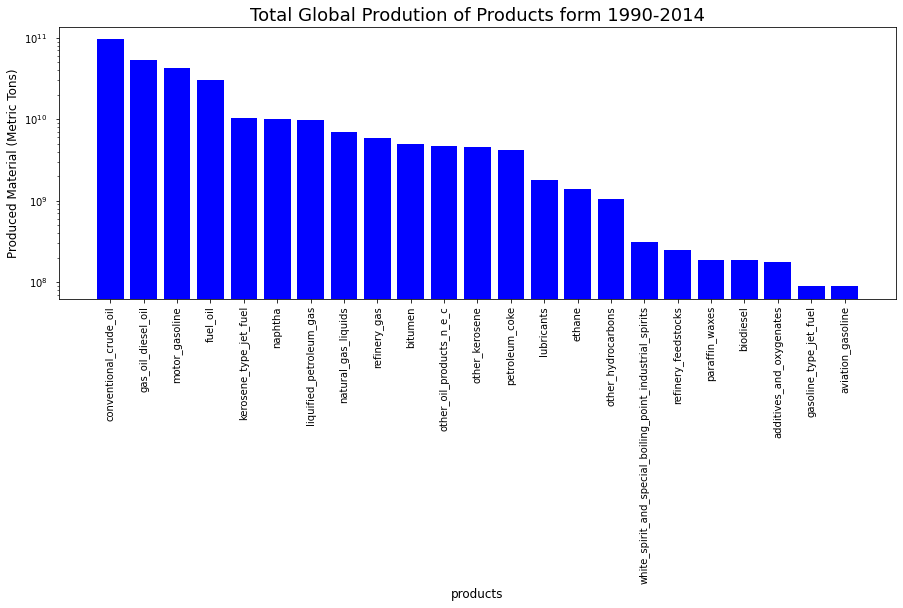

In [191]:
oil_products = total_oil_production['product']
oil_quantity = total_oil_production['quantity']*1000

fig, ax1 = plt.subplots(figsize=(15,5))


ax1.bar(oil_products, oil_quantity, color='blue')
ax1.tick_params('x', labelrotation=90)
ax1.tick_params('y', pad=8)
ax1.set_xlabel('products', fontsize=12)
ax1.set_ylabel('Produced Material (Metric Tons)', fontsize=12)
ax1.set_title('Total Global Prodution of Products form 1990-2014', fontsize=18)
ax1.set_yscale('log')



In [ ]:
# Lets look at the top produced materials over time

In [266]:
oil_production.commodity_transaction.unique()

array(['additives and oxygenates - production',
       'aviation gasoline - production',
       'aviation gasoline - production from plants',
       'aviation gasoline - production from refineries',
       'biodiesel - production', 'bitumen - production',
       'bitumen - production from plants',
       'bitumen - production from refineries',
       'conventional crude oil - production',
       'conventional crude oil - production from off-shore',
       'ethane - production', 'ethane - production from plants',
       'ethane - production from refineries', 'fuel oil - production',
       'fuel oil - production from plants',
       'fuel oil - production from refineries',
       'gas oil/ diesel oil - production',
       'gas oil/ diesel oil - production from plants',
       'gas oil/ diesel oil - production from refineries',
       'gasoline-type jet fuel - production',
       'gasoline-type jet fuel - production from refineries',
       'kerosene-type jet fuel - production',
       '

In [245]:
conventional_crude_oil_production = oil_production[oil_production['product'].str.contains("conventional")].sort_values('year').groupby(['year']).sum().round(3).reset_index()
gas_oil_diesel_oil_production = oil_production[oil_production['product'].str.contains("gas_oil")].sort_values('year').groupby(['year']).sum().round(3).reset_index()
motor_gasoline_production = oil_production[oil_production['product'].str.contains("motor")].sort_values('year').groupby(['year']).sum().round(3).reset_index()
fuel_oil_production = oil_production[oil_production['product'].str.contains("fuel_oil")].sort_values('year').groupby(['year']).sum().round(3).reset_index()

kerosene_jet_fuel_production = oil_production[oil_production['commodity_transaction'].str.contains("kerosene-type")].sort_values('year').groupby(['year']).sum().round(3).reset_index()
naphtha_production = oil_production[oil_production['commodity_transaction'].str.contains("naphtha")].sort_values('year').groupby(['year']).sum().round(3).reset_index()
liquefied_petroleum_gas_production = oil_production[oil_production['commodity_transaction'].str.contains("liquefied")].sort_values('year').groupby(['year']).sum().round(3).reset_index()
natural_gas_liquids_production = oil_production[oil_production['commodity_transaction'].str.contains("liquids")].sort_values('year').groupby(['year']).sum().round(3).reset_index()

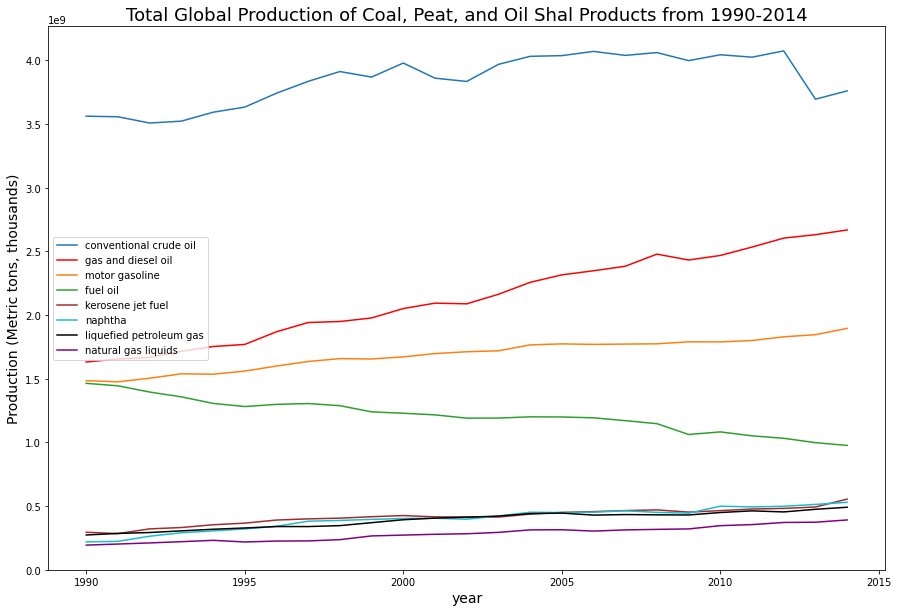

In [251]:
time = conventional_crude_oil_production['year']
conventional_crude_oil = conventional_crude_oil_production['quantity']*1000
gas_and_diesel_oil = gas_oil_diesel_oil_production['quantity']*1000
motor_gasoline = motor_gasoline_production['quantity']*1000
fuel_oil = fuel_oil_production['quantity']*1000
kerosene_jet_fuel = kerosene_jet_fuel_production['quantity']*1000
naphtha = naphtha_production['quantity']*1000
liquefied_petroleum_gas = liquefied_petroleum_gas_production['quantity']*1000
natural_gas_liquids = natural_gas_liquids_production['quantity']*1000


fig, ax = plt.subplots(figsize = (15,10))


ax.plot(time, conventional_crude_oil, label='conventional crude oil')
ax.plot(time, gas_and_diesel_oil, label='gas and diesel oil', color = 'red')
ax.plot(time, motor_gasoline, label='motor gasoline')
ax.plot(time, fuel_oil, label='fuel oil')
ax.plot(time, kerosene_jet_fuel, label='kerosene jet fuel', color='brown')
ax.plot(time, naphtha, label='naphtha', color='C9')
ax.plot(time, liquefied_petroleum_gas, label='liquefied petroleum gas', color='black')
ax.plot(time, natural_gas_liquids, label='natural gas liquids', color='purple')
# ax.ticklabel_format(scilimits= [3,3])

ax.legend()
ax.set_xlabel('year', fontsize=14)
ax.set_ylabel('Production (Metric tons, thousands)', fontsize=14)
ax.set_title('Total Global Production of Coal, Peat, and Oil Shal Products from 1990-2014', fontsize=18)



plt.show()



# Coal Peat and Oil Shale Global Production

In [35]:
Coal_Peat_or_Oil_Shales_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
4940,bulgaria,anthracite - commerce and public services,2014,"Metric tons, thousand",2.0,anthracite,Coal_Peat_or_Oil_Shales
4941,bulgaria,anthracite - commerce and public services,2013,"Metric tons, thousand",4.0,anthracite,Coal_Peat_or_Oil_Shales
4942,bulgaria,anthracite - commerce and public services,2012,"Metric tons, thousand",2.0,anthracite,Coal_Peat_or_Oil_Shales
4943,bulgaria,anthracite - commerce and public services,2011,"Metric tons, thousand",2.0,anthracite,Coal_Peat_or_Oil_Shales
4944,bulgaria,anthracite - commerce and public services,2010,"Metric tons, thousand",2.0,anthracite,Coal_Peat_or_Oil_Shales


In [258]:
# find total energy supply for each product in Coal_Peat_Oil_Shale(CPO) Class


array(['anthracite - production'], dtype=object)

In [37]:
cpo_production = Coal_Peat_or_Oil_Shales_df[Coal_Peat_or_Oil_Shales_df['commodity_transaction'].str.contains("production")]

In [38]:
cpo_production.head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
8430,australia,anthracite - production,2014,"Metric tons, thousand",14.0,anthracite,Coal_Peat_or_Oil_Shales
8431,australia,anthracite - production,2013,"Metric tons, thousand",361.0,anthracite,Coal_Peat_or_Oil_Shales
8432,australia,anthracite - production,2012,"Metric tons, thousand",578.0,anthracite,Coal_Peat_or_Oil_Shales
8433,australia,anthracite - production,2011,"Metric tons, thousand",604.0,anthracite,Coal_Peat_or_Oil_Shales
8434,australia,anthracite - production,2010,"Metric tons, thousand",329.0,anthracite,Coal_Peat_or_Oil_Shales


In [39]:
cpo_production.unit.unique()
# Need to separate produced products measured in Metric tons form Terajoules or convert Terajoules of energy to Metric tons

array(['Metric tons,  thousand', 'Terajoules'], dtype=object)

In [40]:
cpo_production_energy = cpo_production[cpo_production['unit'] == 'Terajoules']

In [41]:
cpo_production_material = cpo_production[cpo_production['unit'] == 'Metric tons,  thousand']

In [42]:
cpo_production_energy.commodity_transaction.unique()
# There is only one product that is reported in terms of energy. 
# Coke oven gas is formed by heating coal to 1100 °C without access of air. The classic composition of coke gas: 
# hydrogen (H2 - 51%), methane (CH4 - 34%), carbon monoxide (CO - 10%), ethylene (C2H4 - 5%)

array(['coke oven gas - production'], dtype=object)

In [43]:
cpo_production_material.commodity_transaction.unique()

array(['anthracite - production', 'brown coal briquettes - production',
       'brown coal - production', 'coal tar - production',
       'coking coal - production', 'gas coke - production',
       'hard coal - production', 'lignite - production',
       'oil shale - production', 'other bituminous coal - production',
       'patent fuel - production', 'peat - production',
       'peat products - production', 'sub-bituminous coal - production'],
      dtype=object)

In [260]:
cpo_production[cpo_production['commodity_transaction'].str.contains("brown coal")].commodity_transaction.unique()

array(['brown coal briquettes - production', 'brown coal - production'],
      dtype=object)

In [44]:
total_cpo_production = cpo_production.groupby(['product']).sum().round(2).drop(['year'], axis=1)
total_cpo_production = total_cpo_production.reset_index()
total_cpo_production = total_cpo_production.sort_values(by=['quantity'], ascending=False)

Text(-1, -0.65, '*Coke Oven Coke is reported in Terajoules because its production generates Coke Oven Gas')

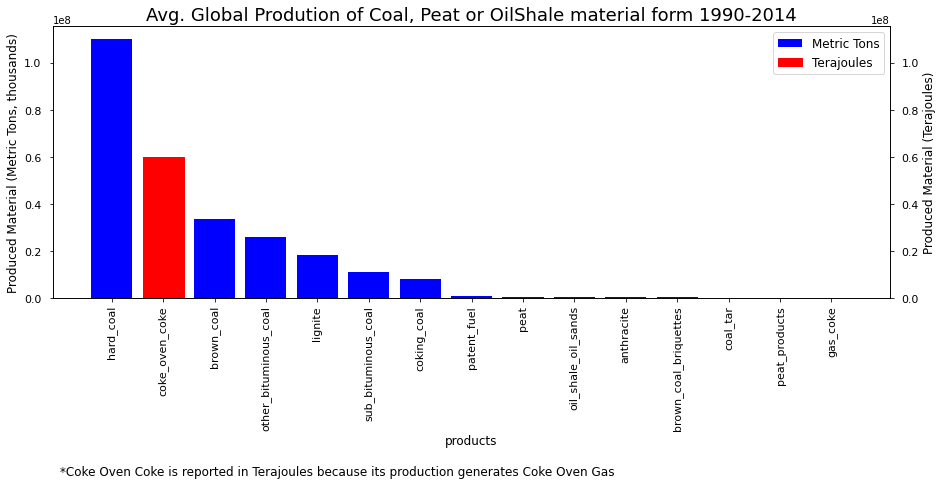

In [113]:
products = total_cpo_production['product']
quantity = total_cpo_production['quantity']

fig, ax1 = plt.subplots(figsize=(15,5))

ax1.bar(products, quantity)
ax1.tick_params('x', labelrotation=90, labelsize=11)
ax1.tick_params('y', pad=8, labelsize=11)
ax1.set_xlabel('products', fontsize=12)
ax1.set_ylabel('Produced Material (Metric Tons, thousands)', fontsize=12)
ax1.set_title('Avg. Global Prodution of Coal, Peat or OilShale material form 1990-2014', fontsize=18)
# ax1.ticklabel_format(scilimits= [3,3])

ax2=ax1.twinx() #instantiate a second axes that shares the same x-axis
ax2.bar(products, quantity)
ax2.set_ylabel('Produced Material (Terajoules)', fontsize=12)
ax2.tick_params('y', pad=8, labelsize=11)

barlist=plt.bar(products, quantity, color='blue')
barlist[1].set_color('red')

ax1.legend(handles=[barlist, barlist[1]], labels=['Metric Tons', 'Terajoules'], fontsize=12)


trans = ax1.get_xaxis_transform()
ax1.annotate('*Coke Oven Coke is reported in Terajoules because its production generates Coke Oven Gas', xy=(-1, -0.65), xycoords=trans, fontsize=12)

In [46]:
# lets look at the top 8 produced products over time

In [252]:
hard_coal_production = cpo_production[cpo_production['commodity_transaction'] == 'hard coal - production'].sort_values('year').groupby(['year']).sum().round(3).reset_index()
coke_oven_coke_production = cpo_production[cpo_production['commodity_transaction'] == 'coke oven gas - production'].sort_values('year').groupby(['year']).sum().round(3).reset_index()
sub_bituminous_coal_production = cpo_production[cpo_production['commodity_transaction'] == 'sub-bituminous coal - production'].sort_values('year').groupby(['year']).sum().round(3).reset_index()
other_bituminous_coal_production = cpo_production[cpo_production['commodity_transaction'] == 'other bituminous coal - production'].sort_values('year').groupby(['year']).sum().round(3).reset_index()

brown_coal_production = cpo_production[cpo_production['commodity_transaction'] == 'brown coal - production'].sort_values('year').groupby(['year']).sum().round(3).reset_index()
lignite_production = cpo_production[cpo_production['commodity_transaction'] == 'lignite - production'].sort_values('year').groupby(['year']).sum().round(3).reset_index()
coking_coal_production = cpo_production[cpo_production['commodity_transaction'] == 'coking coal - production'].sort_values('year').groupby(['year']).sum().round(3).reset_index()
oil_shale_oil_sands_production = cpo_production[cpo_production['commodity_transaction'] == 'oil shale - production'].sort_values('year').groupby(['year']).sum().round(3).reset_index()


In [253]:
# COME BACK TO THIS



cpo_production[cpo_production['commodity_transaction'] == 'coke oven gas - production'].sort_values('year').groupby(['year']).sum().round(3).reset_index()

,year,quantity
0,1990,2441948.00
1,1991,2361062.00
2,1992,2135837.00
3,1993,2107047.00
4,1994,2076275.00
5,1995,2071945.00
6,1996,2074554.00
7,1997,2075864.00
8,1998,2031404.00
9,1999,1909987.00


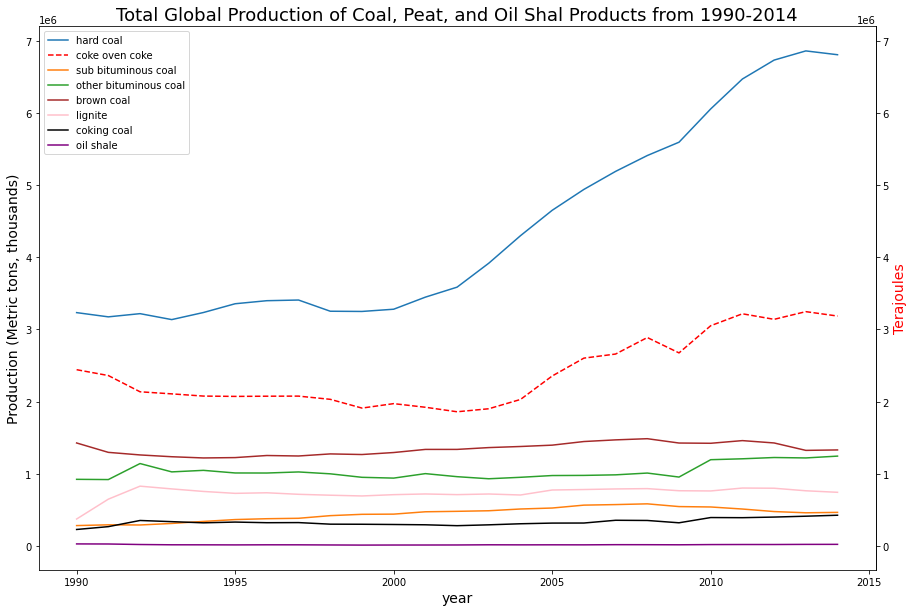

In [254]:
time = hard_coal_production['year']
hard_coal = hard_coal_production['quantity']
coke_oven_coke = coke_oven_coke_production['quantity']
sub_bituminous_coal = sub_bituminous_coal_production['quantity']
other_bituminous_coal = other_bituminous_coal_production['quantity']
brown_coal = brown_coal_production['quantity']
lignite = lignite_production['quantity']
coking_coal = coking_coal_production['quantity']
oil_shale_oil_sands = oil_shale_oil_sands_production['quantity']

fig, ax = plt.subplots(figsize = (15,10))


ax.plot(time, hard_coal, label='hard coal')
ax.plot(time, coke_oven_coke, linestyle = "dashed", label='coke oven coke', color = 'red')
ax.plot(time, sub_bituminous_coal, label='sub bituminous coal')
ax.plot(time, other_bituminous_coal, label='other bituminous coal')
ax.plot(time, brown_coal, label='brown coal', color='brown')
ax.plot(time, lignite, label='lignite', color='pink')
ax.plot(time, coking_coal, label='coking coal', color='black')
ax.plot(time, oil_shale_oil_sands, label='oil shale', color='purple')
# ax.ticklabel_format(scilimits= [3,3])

ax.legend()
ax.set_xlabel('year', fontsize=14)
ax.set_ylabel('Production (Metric tons, thousands)', fontsize=14)
ax.set_title('Total Global Production of Coal, Peat, and Oil Shal Products from 1990-2014', fontsize=18)

secax = ax.secondary_yaxis('right')
secax.set_ylabel('Terajoules', fontsize=14, color="red")


plt.show()



# Natural Manufactured or Recovered Natural Gas Global Production

In [318]:
Natural_Manufactured_or_Recovered_Gas_Production = Natural_Manufactured_or_Recovered_Gas_df[Natural_Manufactured_or_Recovered_Gas_df['commodity_transaction'].str.contains("production")]
Total_Natural_Manufactured_or_Recovered_Gas_Production = Natural_Manufactured_or_Recovered_Gas_Production.groupby(['commodity_transaction']).sum().round(2).drop(['year'], axis=1).reset_index().sort_values(by=['quantity'], ascending=False)


In [319]:
Total_Natural_Manufactured_or_Recovered_Gas_Production['commodity_transaction'] = Total_Natural_Manufactured_or_Recovered_Gas_Production['commodity_transaction'].str.strip(' - production')

In [322]:
# remove gross production of natural gases
Filtered_Total_Natural_Manufactured_or_Recovered_Gas_Production = Total_Natural_Manufactured_or_Recovered_Gas_Production.drop(2)

In [328]:
Filtered_Total_Natural_Manufactured_or_Recovered_Gas_Production = Filtered_Total_Natural_Manufactured_or_Recovered_Gas_Production.replace({'commodity_transaction': 'atural gas (including lng)'}, 'natural gas (including lng)')
Filtered_Total_Natural_Manufactured_or_Recovered_Gas_Production = Filtered_Total_Natural_Manufactured_or_Recovered_Gas_Production.replace({'commodity_transaction': 'her recovered gases'}, 'other recovered gases')

In [310]:
Natural_Manufactured_or_Recovered_Gas_Production.commodity_transaction.unique()

array(['blast furnace gas - production', 'gasworks gas - production',
       'natural gas (including lng) - memo:gross production',
       'natural gas (including lng) - production',
       'other recovered gases - production'], dtype=object)

In [311]:
Natural_Manufactured_or_Recovered_Gas_Production[Natural_Manufactured_or_Recovered_Gas_Production['country_or_area'].str.contains('united states')][Natural_Manufactured_or_Recovered_Gas_Production['commodity_transaction'].str.contains('natural')]

C:\Users\phili\Anaconda3\envs\PandasLearn\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
822755,united states,natural gas (including lng) - memo:gross production,2014,Terajoules,33726056.0,natural_gas_including_lng,Natural_Manufactured_or_Recovered_Gas
822756,united states,natural gas (including lng) - memo:gross production,2013,Terajoules,31645380.0,natural_gas_including_lng,Natural_Manufactured_or_Recovered_Gas
822757,united states,natural gas (including lng) - memo:gross production,2012,Terajoules,31154822.0,natural_gas_including_lng,Natural_Manufactured_or_Recovered_Gas
822758,united states,natural gas (including lng) - memo:gross production,2011,Terajoules,29849958.0,natural_gas_including_lng,Natural_Manufactured_or_Recovered_Gas
822759,united states,natural gas (including lng) - memo:gross production,2010,Terajoules,28113124.0,natural_gas_including_lng,Natural_Manufactured_or_Recovered_Gas
822760,united states,natural gas (including lng) - memo:gross production,2009,Terajoules,27464589.0,natural_gas_including_lng,Natural_Manufactured_or_Recovered_Gas
822761,united states,natural gas (including lng) - memo:gross production,2008,Terajoules,27054304.0,natural_gas_including_lng,Natural_Manufactured_or_Recovered_Gas
822762,united states,natural gas (including lng) - memo:gross production,2007,Terajoules,26104469.0,natural_gas_including_lng,Natural_Manufactured_or_Recovered_Gas
822763,united states,natural gas (including lng) - memo:gross production,2006,Terajoules,24781008.0,natural_gas_including_lng,Natural_Manufactured_or_Recovered_Gas
822764,united states,natural gas (including lng) - memo:gross production,2005,Terajoules,24740629.0,natural_gas_including_lng,Natural_Manufactured_or_Recovered_Gas


In [312]:
Natural_Manufactured_or_Recovered_Gas_df[Natural_Manufactured_or_Recovered_Gas_df['commodity_transaction'].str.contains("natural gas losses")]


,country_or_area,commodity_transaction,year,unit,quantity,product,product_class


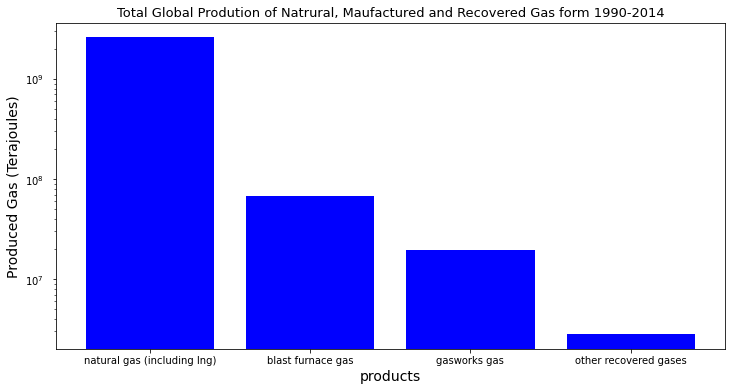

In [335]:
gas_products = Filtered_Total_Natural_Manufactured_or_Recovered_Gas_Production['commodity_transaction']
gas_quantity = Filtered_Total_Natural_Manufactured_or_Recovered_Gas_Production['quantity']

fig, ax1 = plt.subplots(figsize=(12,6))


ax1.bar(gas_products, gas_quantity, color='blue')
ax1.tick_params('x', labelrotation=0)
ax1.tick_params('y', pad=8)
ax1.set_xlabel('products', fontsize=14)
ax1.set_ylabel('Produced Gas (Terajoules)', fontsize=14)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_title('Total Global Prodution of Natrural, Maufactured and Recovered Gas form 1990-2014', fontsize=13)
ax1.set_yscale('log')


In [336]:
# Looking at these products production over time

In [342]:
Natural_Manufactured_or_Recovered_Gas_Production.commodity_transaction.unique()

array(['blast furnace gas - production', 'gasworks gas - production',
       'natural gas (including lng) - memo:gross production',
       'natural gas (including lng) - production',
       'other recovered gases - production'], dtype=object)

In [353]:
natural_gas_including_lng_production = Natural_Manufactured_or_Recovered_Gas_Production[Natural_Manufactured_or_Recovered_Gas_Production['commodity_transaction'] == 'natural gas (including lng) - production'].sort_values('year').groupby(['year']).sum().round(3).reset_index()
blast_furnace_gas_production = Natural_Manufactured_or_Recovered_Gas_Production[Natural_Manufactured_or_Recovered_Gas_Production['commodity_transaction'] == 'blast furnace gas - production'].sort_values('year').groupby(['year']).sum().round(3).reset_index()
gasworks_gas_production = Natural_Manufactured_or_Recovered_Gas_Production[Natural_Manufactured_or_Recovered_Gas_Production['commodity_transaction'] == 'gasworks gas - production'].sort_values('year').groupby(['year']).sum().round(3).reset_index()
other_recovered_gases_production = Natural_Manufactured_or_Recovered_Gas_Production[Natural_Manufactured_or_Recovered_Gas_Production['commodity_transaction'] == 'other recovered gases - production'].sort_values('year').groupby(['year']).sum().round(3).reset_index()

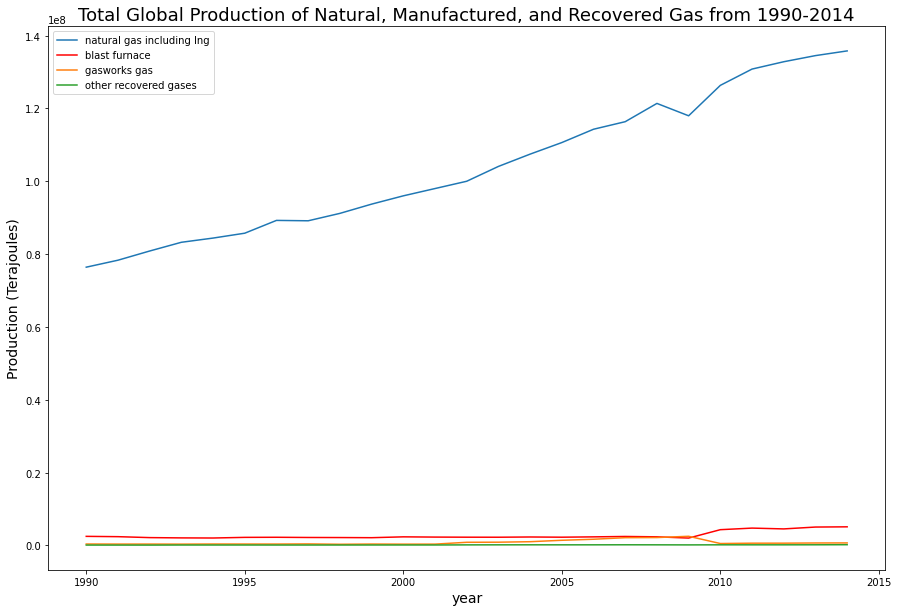

In [356]:
time = natural_gas_including_lng_production['year']
natural_gas_including_lng = natural_gas_including_lng_production['quantity']
blast_furnace = blast_furnace_gas_production['quantity']
gasworks_gas = gasworks_gas_production['quantity']
other_recovered_gases = other_recovered_gases_production['quantity']



fig, ax = plt.subplots(figsize = (15,10))


ax.plot(time, natural_gas_including_lng, label='natural gas including lng')
ax.plot(time, blast_furnace, label='blast furnace', color = 'red')
ax.plot(time, gasworks_gas, label='gasworks gas')
ax.plot(time, other_recovered_gases, label='other recovered gases')

# ax.ticklabel_format(scilimits= [3,3])

ax.legend()
ax.set_xlabel('year', fontsize=14)
ax.set_ylabel('Production (Terajoules)', fontsize=14)
ax.set_title('Total Global Production of Natural, Manufactured, and Recovered Gas from 1990-2014', fontsize=18)



plt.show()


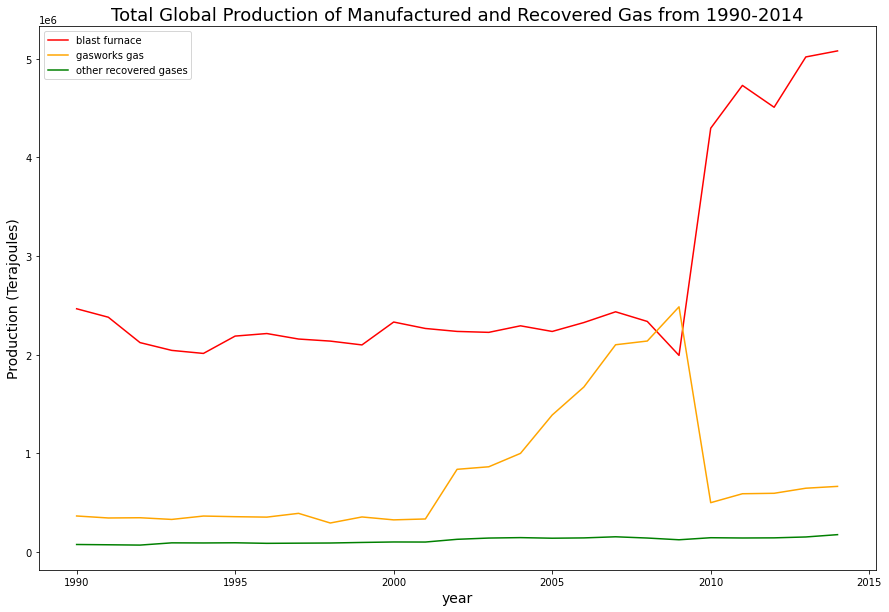

In [362]:
time = natural_gas_including_lng_production['year']
blast_furnace = blast_furnace_gas_production['quantity']
gasworks_gas = gasworks_gas_production['quantity']
other_recovered_gases = other_recovered_gases_production['quantity']



fig, ax = plt.subplots(figsize = (15,10))

ax.plot(time, blast_furnace, label='blast furnace', color = 'red')
ax.plot(time, gasworks_gas, label='gasworks gas', color='orange')
ax.plot(time, other_recovered_gases, label='other recovered gases', color='green')

# ax.ticklabel_format(scilimits= [3,3])

ax.legend()
ax.set_xlabel('year', fontsize=14)
ax.set_ylabel('Production (Terajoules)', fontsize=14)
ax.set_title('Total Global Production of Manufactured and Recovered Gas from 1990-2014', fontsize=18)



plt.show()

# Biofuels and Waste Products

In [541]:
biofuels_waste_production = Biofuels_Waste_df[Biofuels_Waste_df['commodity_transaction'].str.contains('production')]

In [542]:
biofuels_waste_production.unit.unique()

array(['Terajoules', 'Metric tons,  thousand', 'Cubic metres, thousand',
       'Metric Tons'], dtype=object)

In [543]:
total_biofuels_waste_production = biofuels_waste_production.groupby('commodity_transaction').sum().round(3).drop(['year'], axis=1).reset_index()

In [563]:
total_biofuels_waste_production

,commodity_transaction,quantity,units
11,uranium,1.024387e+06,Metric ton
3,biogases,8.472489e+06,Terajoules
8,industrial waste,1.211488e+07,Terajoules
10,other liquid biofuels,1.459564e+07,Metric ton
0,animal waste,1.709709e+07,Terajoules
9,municipal wastes,3.466039e+07,Terajoules
5,black liquor,3.945005e+07,Terajoules
12,vegetal waste,1.679295e+08,Terajoules
4,biogasoline,7.650657e+08,Metric ton
6,charcoal,1.172402e+09,Metric ton


In [545]:
# remove biogases - own use by biogas production plants. This is a measure of consumption
total_biofuels_waste_production = total_biofuels_waste_production.drop(2)

In [548]:
# make metric tons, thousands equvilant to metric tons
total_biofuels_waste_production.iloc[1,1] = total_biofuels_waste_production.iloc[1,1]*1000

In [550]:
total_biofuels_waste_production.iloc[3,1] = total_biofuels_waste_production.iloc[3,1]*1000

In [552]:
total_biofuels_waste_production.iloc[5:7,1] = total_biofuels_waste_production.iloc[5:7,1]*1000

In [554]:
total_biofuels_waste_production.iloc[9,1] = total_biofuels_waste_production.iloc[9,1]*1000

In [556]:
# remove '- production'
total_biofuels_waste_production['commodity_transaction'] = total_biofuels_waste_production['commodity_transaction'].str.rstrip('- production')

In [557]:
# some letter stripped that weren't supposed to be. Correct this
total_biofuels_waste_production = total_biofuels_waste_production.replace({'commodity_transaction': 'fuelw'}, 'fuelwood')
total_biofuels_waste_production = total_biofuels_waste_production.replace({'commodity_transaction': 'black liq'}, 'black liquor')

In [558]:
units = ['Terajoules', 'Metric ton', 'Terajoules','Metric ton','Terajoules','Metric ton','Cubic meters','Terajoules','Terajoules','Metric ton','Metric ton','Terajoules']

In [559]:
total_biofuels_waste_production['units'] = units

In [567]:
total_biofuels_waste_production = total_biofuels_waste_production.sort_values('quantity', ascending=False).sort_values('units')

In [568]:
total_biofuels_waste_production

,commodity_transaction,quantity,units
7,fuelwood,6.299227e+10,Cubic meters
1,bagasse,8.532296e+09,Metric ton
6,charcoal,1.172402e+09,Metric ton
4,biogasoline,7.650657e+08,Metric ton
10,other liquid biofuels,1.459564e+07,Metric ton
11,uranium,1.024387e+06,Metric ton
12,vegetal waste,1.679295e+08,Terajoules
5,black liquor,3.945005e+07,Terajoules
9,municipal wastes,3.466039e+07,Terajoules
0,animal waste,1.709709e+07,Terajoules


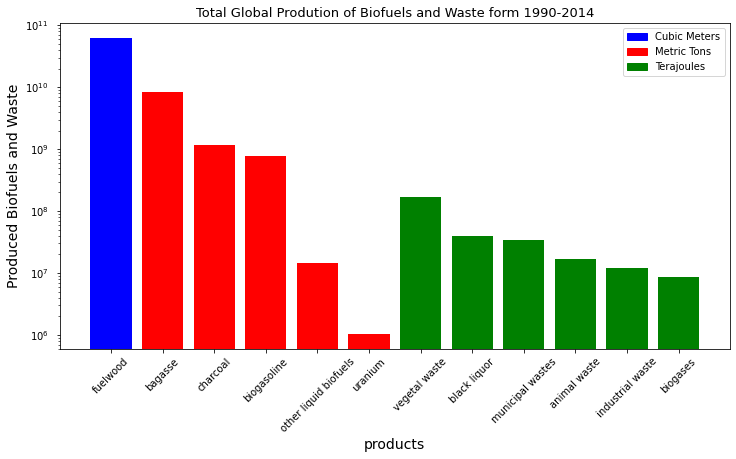

In [598]:
biofuels_waste_products = total_biofuels_waste_production['commodity_transaction']
biofuels_waste_quantity = total_biofuels_waste_production['quantity']

fig, ax1 = plt.subplots(figsize=(12,6))


ax1.bar(biofuels_waste_products, biofuels_waste_quantity, color=['blue','red','red','red','red','red','green','green','green','green','green','green'])
ax1.tick_params('x', labelrotation=45)
ax1.tick_params('y', pad=8)
ax1.set_xlabel('products', fontsize=14)
ax1.set_ylabel('Produced Biofuels and Waste', fontsize=14)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_title('Total Global Prodution of Biofuels and Waste form 1990-2014', fontsize=13)
ax1.set_yscale('log')

blue_label = mpatches.Patch(color='blue', label='Cubic Meters')
red_label = mpatches.Patch(color='red', label='Metric Tons')
green_label = mpatches.Patch(color='green', label='Terajoules')

ax1.legend(handles=[blue_label,red_label,green_label])



In [599]:
# look at annual production over time

In [634]:
biofuels_waste_production[biofuels_waste_production['commodity_transaction'].str.contains('biogases - production')].commodity_transaction.unique()

array(['biogases - production'], dtype=object)

In [622]:
def biofuels_waste_annual_production(x):
    return biofuels_waste_production[biofuels_waste_production['commodity_transaction'].str.contains(x)].sort_values('year').groupby(['year']).sum().round(3).reset_index()

In [653]:
fuelwood_production = biofuels_waste_annual_production('fuelwood')
bagasse_production = biofuels_waste_annual_production('bagasse')
charcoal_production = biofuels_waste_annual_production('charcoal')
biogasoline_production = biofuels_waste_annual_production('biogasoline')
other_liquid_biofuels_production = biofuels_waste_annual_production('other liquid biofuels')
uranium_production = biofuels_waste_annual_production('uranium')

In [639]:
vegetal_waste_production = biofuels_waste_annual_production('vegetal')
black_liquor_production = biofuels_waste_annual_production('black liquor')
municipal_wastes_production = biofuels_waste_annual_production('municipal')
animal_wastes_produciton = biofuels_waste_annual_production('animal')
industrial_waste_production = biofuels_waste_annual_production('industrial')
biogases_production = biofuels_waste_annual_production('biogases')

In [654]:
# Other liquid biofuels started reporting in 1992. Need to add rows to represent 1990 and 1991
other_liquid_biofuels_production.loc[-1] = [1991, 0]
other_liquid_biofuels_production.index = other_liquid_biofuels_production.index + 1
other_liquid_biofuels_production = other_liquid_biofuels_production.sort_index()

In [659]:
other_liquid_biofuels_production.loc[-1] = [1990, 0]
other_liquid_biofuels_production.index = other_liquid_biofuels_production.index + 1
other_liquid_biofuels_production = other_liquid_biofuels_production.sort_index()

In [668]:
uranium_production

,year,quantity
0,1990,33395.00
1,1991,28713.00
2,1992,34496.00
3,1993,33207.00
4,1994,31610.00
5,1995,33154.00
6,1996,36182.00
7,1997,36793.00
8,1998,34886.00
9,1999,32946.00


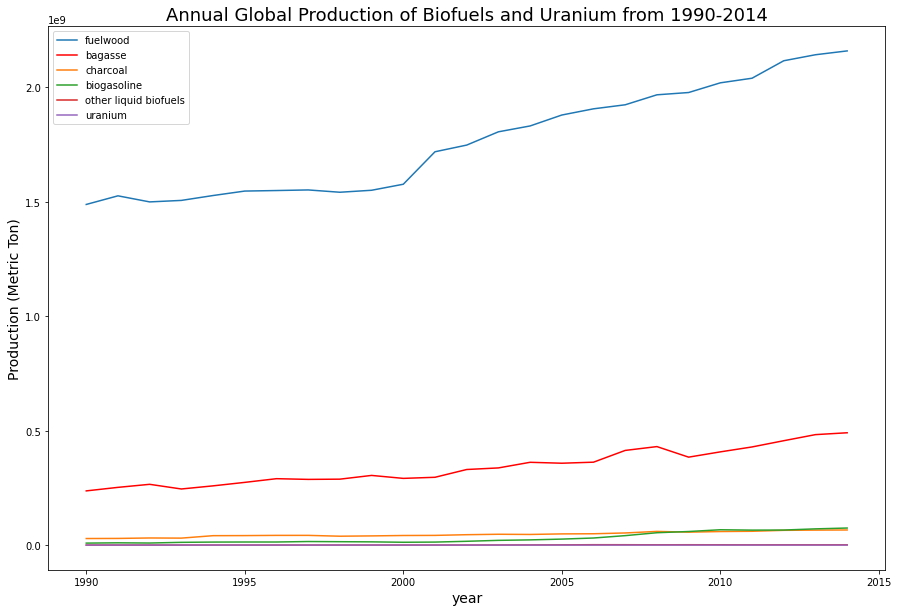

In [683]:
time = fuelwood_production['year']
# convert fuelwood from cubic meters to metric ton. Avg. fuelwood density if is between 650-750 kg/m3 
fuelwood = fuelwood_production['quantity'] * 700
bagasse = bagasse_production['quantity'] *1000 #to convert from (Metric ton, thousand) to (Metric ton)
charcoal = charcoal_production['quantity'] *1000 #to convert from (Metric ton, thousand) to (Metric ton)
biogasoline = biogasoline_production['quantity'] *1000 #to convert from (Metric ton, thousand) to (Metric ton)
other_liquid_biofuels = other_liquid_biofuels_production['quantity'] *1000 #to convert from (Metric ton, thousand) to (Metric ton)
uranium = uranium_production['quantity']


fig, ax = plt.subplots(figsize = (15,10))


ax.plot(time, fuelwood, label='fuelwood')
ax.plot(time, bagasse, label='bagasse', color = 'red')
ax.plot(time, charcoal, label='charcoal')
ax.plot(time, biogasoline, label='biogasoline')
ax.plot(time, other_liquid_biofuels, label='other liquid biofuels')
ax.plot(time, uranium, label='uranium')

# ax.ticklabel_format(scilimits= [3,3])

ax.legend()
ax.set_xlabel('year', fontsize=14)
ax.set_ylabel('Production (Metric Ton)', fontsize=14)
ax.set_title('Annual Global Production of Biofuels and Uranium from 1990-2014', fontsize=18)

plt.show()



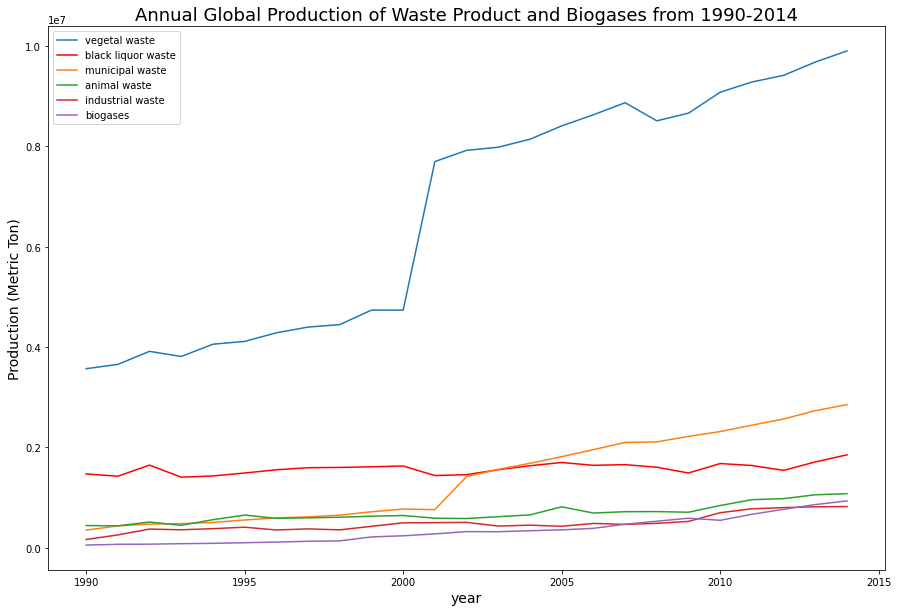

In [681]:
time = fuelwood_production['year']
vegetal_waste = vegetal_waste_production['quantity'] 
black_liquor_waste = black_liquor_production['quantity']
municipal_waste = municipal_wastes_production['quantity']
animal_waste = animal_wastes_produciton['quantity']
industrial_waste = industrial_waste_production['quantity']
biogases = biogases_production['quantity']


fig, ax = plt.subplots(figsize = (15,10))


ax.plot(time, vegetal_waste, label='vegetal waste')
ax.plot(time, black_liquor_waste, label='black liquor waste', color = 'red')
ax.plot(time, municipal_waste, label='municipal waste')
ax.plot(time, animal_waste, label='animal waste')
ax.plot(time, industrial_waste, label='industrial waste')
ax.plot(time, biogases, label='biogases')

# ax.ticklabel_format(scilimits= [3,3])

ax.legend()
ax.set_xlabel('year', fontsize=14)
ax.set_ylabel('Production (Terajoules)', fontsize=14)
ax.set_title('Annual Global Production of Waste Product and Biogases from 1990-2014', fontsize=18)

plt.show()

# Electricity Production

In [691]:
Electricity_df['commodity_transaction'].unique()

array(['electricity generating capacity - from other sources - autoproducers',
       'electricity generating capacity - from other sources - main activity producers',
       'electricity generating capacity - from other sources - total',
       'electricity generating capacity - pumped hydro - autoproducers',
       'electricity generating capacity - pumped hydro - main activity producers',
       'electricity generating capacity - pumped hydro - total',
       'electricity generating capacity - solar pv - autoproducers',
       'electricity generating capacity - solar pv - main activity producers',
       'electricity generating capacity - solar pv - total',
       'electricity generating capacity - solar thermal - autoproducers',
       'electricity generating capacity - solar thermal - main activity producers',
       'electricity generating capacity - solar thermal - total',
       'electricity - net installed capacity of electric power plants, public combustible fuels',
       'e

In [692]:
Electricity_df[Electricity_df['commodity_transaction'].str.contains('electricity - total production, autoproducer')]

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
1133492,afghanistan,"electricity - total production, autoproducer",2014,"Kilowatt-hours, million",307.0,total_electricity,Electricity
1133493,afghanistan,"electricity - total production, autoproducer",2013,"Kilowatt-hours, million",276.0,total_electricity,Electricity
1133494,afghanistan,"electricity - total production, autoproducer",2012,"Kilowatt-hours, million",301.0,total_electricity,Electricity
1133495,afghanistan,"electricity - total production, autoproducer",2011,"Kilowatt-hours, million",286.0,total_electricity,Electricity
1133496,afghanistan,"electricity - total production, autoproducer",2010,"Kilowatt-hours, million",270.0,total_electricity,Electricity
...,...,...,...,...,...,...,...
1137163,zimbabwe,"electricity - total production, autoproducer",1996,"Kilowatt-hours, million",25.0,total_electricity,Electricity
1137164,zimbabwe,"electricity - total production, autoproducer",1995,"Kilowatt-hours, million",25.0,total_electricity,Electricity
1137165,zimbabwe,"electricity - total production, autoproducer",1994,"Kilowatt-hours, million",23.0,total_electricity,Electricity
1137166,zimbabwe,"electricity - total production, autoproducer",1993,"Kilowatt-hours, million",25.0,total_electricity,Electricity


In [693]:
# production of electricity comes from autoproducers or main activity plants
electricity_production = Electricity_df[Electricity_df['commodity_transaction'].str.contains("autoproducer|main activity")]

In [694]:
electricity_production['commodity_transaction'].head()

204398    electricity generating capacity - from other sources - autoproducers
204399    electricity generating capacity - from other sources - autoproducers
204400    electricity generating capacity - from other sources - autoproducers
204401    electricity generating capacity - from other sources - autoproducers
204402    electricity generating capacity - from other sources - autoproducers
Name: commodity_transaction, dtype: object

In [695]:
electricity_production = electricity_production.groupby(['commodity_transaction']).sum().round(2).drop(['year'], axis=1).reset_index()

In [696]:
electricity_production['commodity_transaction'].unique()

array(['electricity - total net installed capacity of electric power plants, autoproducer',
       'electricity - total net installed capacity of electric power plants, main activity',
       'electricity - total net installed capacity of electric power plants, main activity & autoproducer',
       'electricity - total production, autoproducer',
       'electricity - total production, main activity',
       'electricity generating capacity - from other sources - autoproducers',
       'electricity generating capacity - from other sources - main activity producers',
       'electricity generating capacity - pumped hydro - autoproducers',
       'electricity generating capacity - pumped hydro - main activity producers',
       'electricity generating capacity - solar pv - autoproducers',
       'electricity generating capacity - solar pv - main activity producers',
       'electricity generating capacity - solar thermal - autoproducers',
       'electricity generating capacity - solar th

In [697]:
# create new dataframe for rows refering to electric capacity and
# drop the same rows in electricity_production

total_electric_capacity = electricity_production[electricity_production['commodity_transaction'].str.contains("capacity")]

In [698]:
total_electricity_production = electricity_production.iloc[13:]

In [147]:
total_electricity_production = electricity_production.sort_values(by=['quantity'], ascending=False)

In [699]:
total_electricity_production['commodity_transaction'].unique()

array(['from chemical heat – autoproducer',
       'from chemical heat – autoproducer – chp plants',
       'from chemical heat – autoproducer – electricity plants',
       'from chemical heat – main activity',
       'from chemical heat – main activity – chp plants',
       'from chemical heat – main activity – electricity plants',
       'from combustible fuels – autoproducer',
       'from combustible fuels – autoproducer – chp plants',
       'from combustible fuels – autoproducer – electricity plants',
       'from combustible fuels – main activity',
       'from combustible fuels – main activity – chp plants',
       'from combustible fuels – main activity – electricity plants',
       'from other sources – autoproducer',
       'from other sources – autoproducer – chp plants',
       'from other sources – autoproducer – electricity plants',
       'from other sources – main activity',
       'from other sources – main activity – chp plants',
       'from other sources – main act

In [702]:
total_electricity_production

,commodity_transaction,quantity
13,from chemical heat – autoproducer,1.265000e+04
14,from chemical heat – autoproducer – chp plants,6.275000e+03
15,from chemical heat – autoproducer – electricity plants,6.375000e+03
16,from chemical heat – main activity,1.398000e+03
17,from chemical heat – main activity – chp plants,1.165000e+03
18,from chemical heat – main activity – electricity plants,2.330000e+02
19,from combustible fuels – autoproducer,2.820016e+07
20,from combustible fuels – autoproducer – chp plants,1.086777e+07
21,from combustible fuels – autoproducer – electricity plants,1.346586e+07
22,from combustible fuels – main activity,2.556860e+08


Text(0.5, 1.0, 'Avg. Global Prodution of Electricity form 1990-2014')

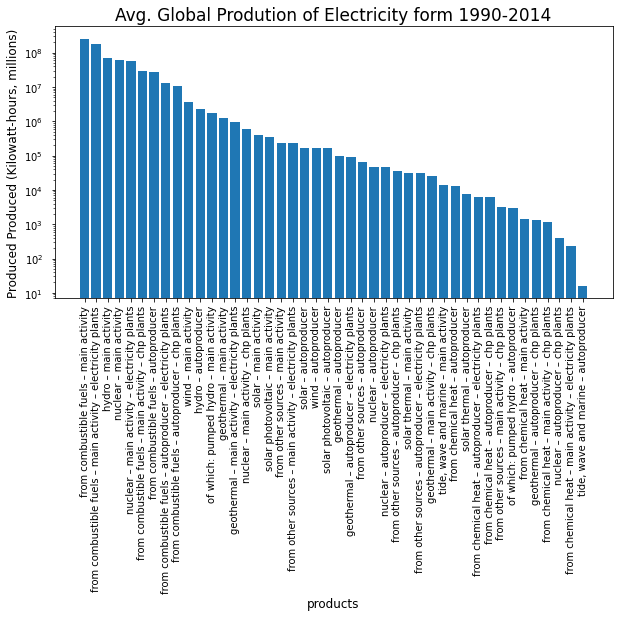

In [148]:
electric_products = electricity_production['commodity_transaction']
electric_quantity = electricity_production['quantity']

fig, ax1 = plt.subplots(figsize=(10,5))


ax1.bar(electric_products, electric_quantity)
ax1.tick_params('x', labelrotation=90)
ax1.tick_params('y', pad=8)
ax1.set_xlabel('products', fontsize=12)
ax1.set_ylabel('Produced Produced (Kilowatt-hours, millions)', fontsize=12)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_yscale('log')
ax1.set_title('Avg. Global Prodution of Electricity form 1990-2014', fontsize=17)

In [703]:
total_electricity_production_autoproducers = total_electricity_production[total_electricity_production['commodity_transaction'].str.contains('autoproducer')]

In [738]:
autoproducer_chp_plant_production = total_electricity_production_autoproducers[total_electricity_production_autoproducers['commodity_transaction'].str.contains('– chp plants')]

In [741]:
autoproducer_electricity_plant_production = total_electricity_production_autoproducers[total_electricity_production_autoproducers['commodity_transaction'].str.contains('electricity')]

In [733]:
autoproducer_chp_plant_indices = autoproducer_chp_plant_production.index.to_numpy()

In [743]:
autoproducer_electricity_plant_indices = autoproducer_electricity_plant_production.index.to_numpy()

In [744]:
total_electricity_production_autoproducers = total_electricity_production_autoproducers.drop(autoproducer_chp_plant_indices)

In [745]:
total_electricity_production_autoproducers = total_electricity_production_autoproducers.drop(autoproducer_electricity_plant_indices)

In [751]:
total_electricity_production_autoproducers = total_electricity_production_autoproducers.sort_values('quantity', ascending=False)

Text(0.5, 1.0, 'Avg. Global Prodution of Electricity form 1990-2014')

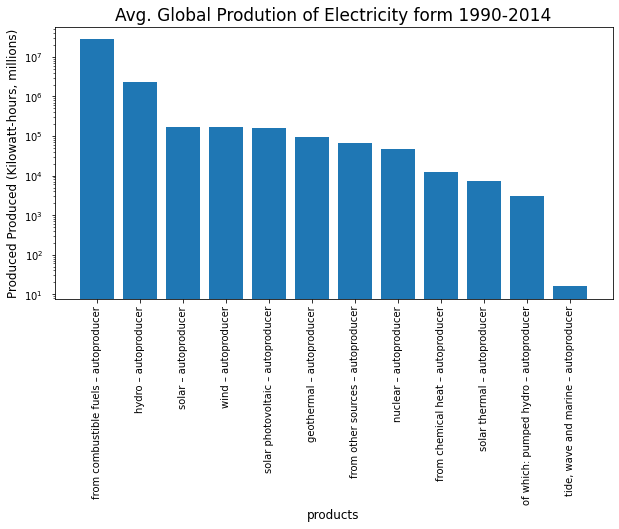

In [752]:
autoproducer = total_electricity_production_autoproducers['commodity_transaction']
autoproducer_quantity = total_electricity_production_autoproducers['quantity']

fig, ax1 = plt.subplots(figsize=(10,5))


ax1.bar(autoproducer, autoproducer_quantity)
ax1.tick_params('x', labelrotation=90)
ax1.tick_params('y', pad=8)
ax1.set_xlabel('products', fontsize=12)
ax1.set_ylabel('Produced Produced (Kilowatt-hours, millions)', fontsize=12)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_yscale('log')
ax1.set_title('Avg. Global Prodution of Electricity form 1990-2014', fontsize=17)

In [62]:
# total electricity category is vague. It doesn't seem right that nuclear energy generated the most electricity globally
# What about electricity generated from coal, oil, natural gas??

In [685]:
combustion_fuels_elec_prod = Electricity_df[Electricity_df['commodity_transaction'].str.contains("from combustible fuels")]
combustion_fuels_elec_prod.head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
1143312,afghanistan,from combustible fuels – autoproducer,2014,"Kilowatt-hours, million",5.0,total_electricity,Electricity
1143313,afghanistan,from combustible fuels – autoproducer,2013,"Kilowatt-hours, million",5.0,total_electricity,Electricity
1143314,afghanistan,from combustible fuels – autoproducer,2012,"Kilowatt-hours, million",5.0,total_electricity,Electricity
1143315,afghanistan,from combustible fuels – autoproducer,2011,"Kilowatt-hours, million",5.0,total_electricity,Electricity
1143316,afghanistan,from combustible fuels – autoproducer,2010,"Kilowatt-hours, million",5.0,total_electricity,Electricity


In [64]:
combustion_fuels_elec_prod.groupby(['commodity_transaction']).mean().round(2).drop(['year'], axis=1)

,quantity
commodity_transaction,
from combustible fuels – autoproducer,7837.73
from combustible fuels – autoproducer – chp plants,11573.77
from combustible fuels – autoproducer – electricity plants,7560.84
from combustible fuels – main activity,46751.88
from combustible fuels – main activity – chp plants,32858.65
from combustible fuels – main activity – electricity plants,66038.49


In [65]:
combustion_fuels_elec_prod.groupby(['commodity_transaction']).mean().round(2).drop(['year'], axis=1).sum()
# this is more than double than the average annual electricity output from nuclear

quantity    172621.36
dtype: float64

In [66]:
nuclear_production = Electricity_df[Electricity_df['commodity_transaction'].str.contains("nuclear – ")]

In [67]:
nuclear_production['commodity_transaction'].unique()

array(['nuclear – autoproducer', 'nuclear – autoproducer – chp plants',
       'nuclear – autoproducer – electricity plants',
       'nuclear – main activity', 'nuclear – main activity – chp plants',
       'nuclear – main activity – electricity plants'], dtype=object)

In [68]:
nuclear_production.groupby(['commodity_transaction']).mean().round(2).drop(['year'], axis=1)

,quantity
commodity_transaction,
nuclear – autoproducer,1406.79
nuclear – autoproducer – chp plants,79.00
nuclear – autoproducer – electricity plants,1655.00
nuclear – main activity,82722.88
nuclear – main activity – chp plants,12377.21
nuclear – main activity – electricity plants,106007.71


In [69]:
# lets unpack total_electricity product group

In [70]:
total_electricity = Electricity_df[Electricity_df['product'].str.contains("total_electricity")]


In [71]:
total_electricity['commodity_transaction'].unique()
# total_electricity product group contains production of from chemical heat, comubstible fuels, orther sources, geothermal
# hydro, nuclear, pumpedhydro,solar, tidal, and wind

array(['electricity - consumption by chemical and petrochemical',
       'electricity - consumption by commercial and public services',
       'electricity - consumption by construction',
       'electricity - consumption by food and tobacco',
       'electricity - consumption by households',
       'electricity - consumption by iron and steel',
       'electricity - consumption by machinery',
       'electricity - consumption by manufacturing, construction and non-fuel industry',
       'electricity - consumption by mining and quarrying',
       'electricity - consumption by non-ferrous metals',
       'electricity - consumption by non-metallic minerals',
       'electricity - consumption by other',
       'electricity - consumption by other manuf., const. and non-fuel ind.',
       'electricity - consumption by paper, pulp and print',
       'electricity - consumption by pipeline transport',
       'electricity - consumption by rail',
       'electricity - consumption by road',
     

In [72]:
total_electricity_production = total_electricity[total_electricity['commodity_transaction'].str.contains("production")]